<a href="https://colab.research.google.com/github/acanetti/Profiler/blob/master/Word_cloud_Democratie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import numpy as np 
import os  
PATH ='drive/My Drive/data' 
import wordcloud
import matplotlib.pyplot as plt
%matplotlib inline 

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import données Démocratie 

In [68]:
df=pd.read_csv(PATH + '/democratie_clean.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [69]:
df.head(2)

,Unnamed: 0,title,authorZipCode,Q_0,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_14,Q_15,Q_16,Q_17,Q_18,Q_19,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35,Q_36
0,0,Les augmentations de rémunérations,79190,Le citoyen,Non,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,Afin d’éviter de creuser les inégalités ne plu...
1,1,rénover l'enquête publique pour en faire un vr...,1800,Un instrument de démocratie locale à modernise...,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//,//


## Concatenation de toute les colonnes pour créer dictionnaire 

In [0]:
concat_all='' 
for i in range(37): 
    concat_all += df[f'Q_{i}'] + ' % '

In [0]:
concat_np = concat_all.values 

# Word Vectorizer 

In [0]:
import  sklearn.feature_extraction.text  as TF

In [73]:

concat_all

0         Le citoyen % Non % // % // % // % // % // % //...
1         Un instrument de démocratie locale à modernise...
2         // % // % // % // % // % // % // % // % // % /...
3         Voir l'intégralité de la proposition dans la d...
4         député, maire, moi même % Non % // % Budget pa...
                                ...                        
116544    Le milieu associatif, Les élus locaux. % Oui %...
116545    // % Oui % // % // % Une bonne chose % // % //...
116546    aucun. % Non % // % // % Une mauvaise chose % ...
116547    en moi même! % Oui % syndicats % moins de mens...
116548    Moi % Oui % Il faut de toute urgence former le...
Name: Q_0, Length: 116549, dtype: object

In [0]:
awesome_mega_list= []
for i in concat_all : 
     tmp_str = i.split(' ') 
     for val in tmp_str: 
         if len(val) > 4 :
             awesome_mega_list.append(val)

In [75]:
len(awesome_mega_list)

27016608

In [0]:
from collections import Counter 
from PIL import Image

In [0]:
vocab_count = Counter(awesome_mega_list)

In [0]:
vocab_most_common = vocab_count.most_common(500)

In [0]:
Voc_mc = {elem[0] : elem[1] for elem in vocab_most_common}

In [0]:
france_mask = np.array(Image.open('francemask'))
face_mask=np.array(Image.open('facemask.jpg')) 
lol_mask = np.array(Image.open('test1.jpg')) 

In [0]:
wc_com = wordcloud.WordCloud(background_color="white",
               width=1000,height=1000, mask=face_mask, 
               max_words=300,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(Voc_mc)


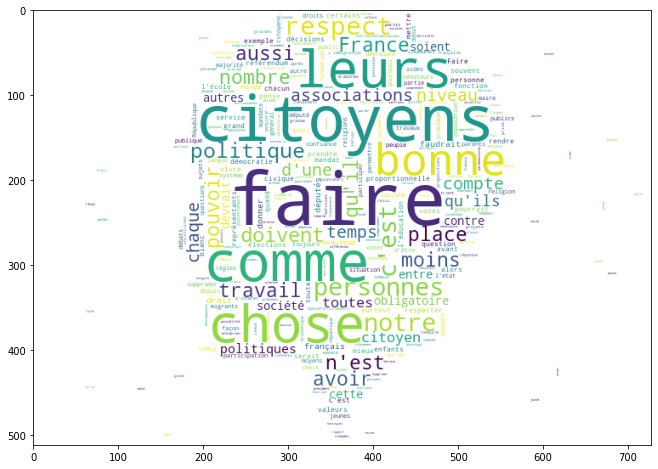

In [113]:
plt.imshow(wc_com)

In [114]:
wc_com.to_file('face.jpg')